In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
import torch
import torch.nn as nn
import math
from utils import MyDataset, read_data, visualize, set_seed
from torch.utils.data import DataLoader
import numpy as np
from training import train, test
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEQ_LEN = 200
dim_inputs = 50
hidden_size = 100
latent_size = 100

batch_size = 64
base_lr = 0.01
lr_step = 10
num_epochs = 100

# Set random seed
set_seed(1021)

In [125]:
file = "../Simulation/data/simu1.csv"
data = read_data(file, None, SEQ_LEN, dim_inputs)

In [225]:
# Set random seed
set_seed(1021)
train_data = data
print(data.shape)
train_locs = np.array([[1, 1] for _ in range(data.shape[0])])
net = train(train_data, train_locs, batch_size, base_lr, lr_step, num_epochs, hidden_size, latent_size, SEQ_LEN)

(199, 200, 50)
Epoch [1/100], Loss1: 661.5669, Loss2: 18.7702, Loss3: 0.0018
Epoch [2/100], Loss1: 353.9559, Loss2: 17.6993, Loss3: 0.0086
Epoch [3/100], Loss1: 121.8378, Loss2: 15.2189, Loss3: 0.0239
Epoch [4/100], Loss1: 623.8442, Loss2: 15.6530, Loss3: 0.0219
Epoch [5/100], Loss1: 163.9794, Loss2: 17.3642, Loss3: 0.0462
Epoch [6/100], Loss1: 254.3761, Loss2: 32.1463, Loss3: 0.0329
Epoch [7/100], Loss1: 126.4075, Loss2: 17.5078, Loss3: 0.0640
Epoch [8/100], Loss1: 382.9769, Loss2: 28.0401, Loss3: 0.3181
Epoch [9/100], Loss1: 119.7792, Loss2: 38.9870, Loss3: 0.2766
Epoch [10/100], Loss1: 94.0816, Loss2: 32.9428, Loss3: 0.1816
Epoch [11/100], Loss1: 68.2221, Loss2: 34.0883, Loss3: 0.1971
Epoch [12/100], Loss1: 82.8453, Loss2: 10.7887, Loss3: 0.0430
Epoch [13/100], Loss1: 91.5817, Loss2: 5.7325, Loss3: 0.0150
Epoch [14/100], Loss1: 89.1712, Loss2: 9.6891, Loss3: 0.0329
Epoch [15/100], Loss1: 80.3560, Loss2: 11.1123, Loss3: 0.0255
Epoch [16/100], Loss1: 100.6031, Loss2: 1.5799, Loss3: 0.

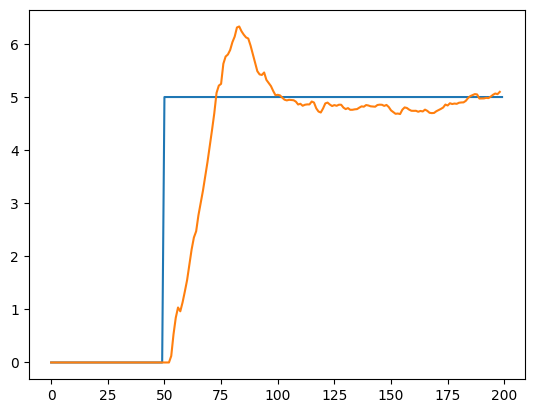

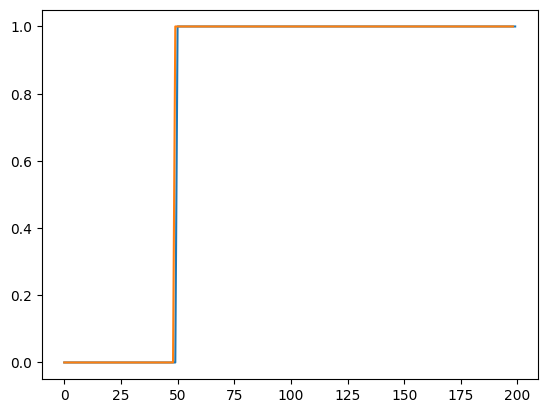

In [226]:
test_data = data
prediction, generation, trans_status = test(test_data, train_locs, net)
avg_gen = torch.mean(generation, dim=0).view(-1).cpu().detach().numpy()
# rates = [10]*60 + [0.1]*60 + [5]*80
rates = [0]*50 + [5]*150
onoff = [0]*50 + [1]*150
# visualize(rates, avg_gen)
visualize(rates, generation[1].view(-1).cpu().detach().numpy())
visualize(onoff, trans_status[1].view(-1).cpu().detach().numpy())
# for i in range(100):
#     switch = trans_status[i].view(-1).cpu().detach().numpy()
#     plt.plot(switch)

2. Run on simu with $[0]*60 + [10]*90 + [5]*50$

    param: loss_var=0.005

In [ ]:
file = "simu1.csv"
data = read_data(file, SEQ_LEN, dim_inputs)

(999, 199, 50)


In [ ]:
train_data = data[:-1]
net = train(train_data, batch_size, base_lr, lr_step, num_epochs)

Epoch [1/100], Loss1: 141.1260, Loss2: 21.9337
Epoch [2/100], Loss1: 8.7953, Loss2: 15.9149
Epoch [3/100], Loss1: 5.3476, Loss2: 23.9737
Epoch [4/100], Loss1: 4.9140, Loss2: 20.8226
Epoch [5/100], Loss1: 3.4527, Loss2: 24.4614
Epoch [6/100], Loss1: 4.6322, Loss2: 25.0172
Epoch [7/100], Loss1: 3.4590, Loss2: 27.5427
Epoch [8/100], Loss1: 3.5610, Loss2: 19.5543
Epoch [9/100], Loss1: 3.4536, Loss2: 21.0655
Epoch [10/100], Loss1: 3.2050, Loss2: 30.1600
Epoch [11/100], Loss1: 2.5529, Loss2: 34.7045
Epoch [12/100], Loss1: 2.3404, Loss2: 31.0256
Epoch [13/100], Loss1: 2.1218, Loss2: 29.0228
Epoch [14/100], Loss1: 2.2047, Loss2: 29.1652
Epoch [15/100], Loss1: 1.8673, Loss2: 28.2334
Epoch [16/100], Loss1: 2.0423, Loss2: 29.5464
Epoch [17/100], Loss1: 1.8963, Loss2: 29.5671
Epoch [18/100], Loss1: 1.6252, Loss2: 31.0287
Epoch [19/100], Loss1: 1.9028, Loss2: 31.9658
Epoch [20/100], Loss1: 1.6209, Loss2: 30.0282
Epoch [21/100], Loss1: 1.4541, Loss2: 30.7982
Epoch [22/100], Loss1: 1.3757, Loss2: 31.

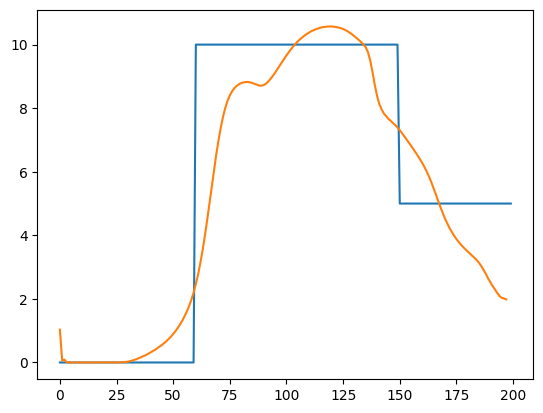

In [ ]:
test_data = data[-100:]
prediction, generation = test(test_data, net)
avg_gen = torch.mean(generation, dim=0).view(-1).cpu().detach().numpy()
rates = [0]*60 + [10]*90 + [5]*50
visualize(rates, avg_gen)

3. Run on simu with $[5]*60 + [20]*90 + [10]*50$

In [3]:
file = "simu2.csv"
data = read_data(file, SEQ_LEN, dim_inputs)

(999, 199, 50)


In [4]:
train_data = data[:-1]
net = train(train_data, batch_size, base_lr, lr_step, num_epochs)

Epoch [1/100], Loss1: 97.9086, Loss2: 24.8707
Epoch [2/100], Loss1: 18.6858, Loss2: 14.4866
Epoch [3/100], Loss1: 13.7455, Loss2: 16.6067
Epoch [4/100], Loss1: 10.9112, Loss2: 42.7714
Epoch [5/100], Loss1: 10.1447, Loss2: 85.1563
Epoch [6/100], Loss1: 7.3339, Loss2: 108.5504
Epoch [7/100], Loss1: 8.0280, Loss2: 121.2753
Epoch [8/100], Loss1: 5.1582, Loss2: 140.0593
Epoch [9/100], Loss1: 8.8580, Loss2: 147.1010
Epoch [10/100], Loss1: 6.9097, Loss2: 155.3195
Epoch [11/100], Loss1: 4.0581, Loss2: 148.1990
Epoch [12/100], Loss1: 4.2398, Loss2: 134.2909
Epoch [13/100], Loss1: 3.4378, Loss2: 145.9728
Epoch [14/100], Loss1: 3.9199, Loss2: 146.5979
Epoch [15/100], Loss1: 2.9486, Loss2: 158.9644
Epoch [16/100], Loss1: 3.9978, Loss2: 151.8967
Epoch [17/100], Loss1: 3.3556, Loss2: 156.5384
Epoch [18/100], Loss1: 3.7452, Loss2: 155.6702
Epoch [19/100], Loss1: 3.1104, Loss2: 165.6620
Epoch [20/100], Loss1: 3.3963, Loss2: 160.6812
Epoch [21/100], Loss1: 2.7253, Loss2: 161.5335
Epoch [22/100], Loss1:

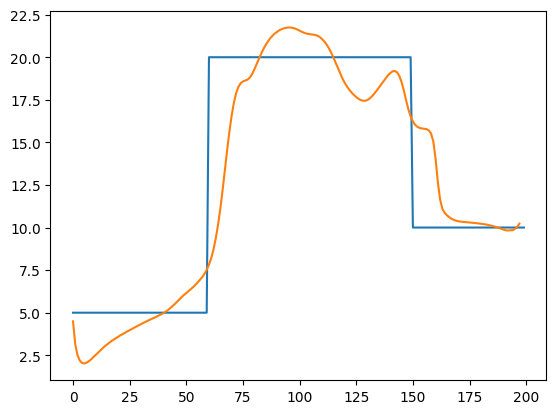

In [5]:
test_data = data[-100:]
prediction, generation = test(test_data, net)
avg_gen = torch.mean(generation, dim=0).view(-1).cpu().detach().numpy()
rates = [5]*60 + [20]*90 + [10]*50
visualize(rates, avg_gen)

In [ ]:
%cd drive/MyDrive/optical/

/content/drive/MyDrive/optical
